Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [50]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [52]:
# Remove unnecessary columns
columns_to_drop = ['homepage', 'keywords', 'original_language', 'original_title', 
                   'overview', 'production_companies', 'status', 'tagline']
movies_df.drop(columns=columns_to_drop, inplace=True)

#### Remove any duplicate rows

In [53]:
# Remove duplicate rows
movies_df.drop_duplicates(inplace=True)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [54]:
# Remove rows with missing data (zero budget or zero revenue)
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [55]:
# Change data types
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df[['budget', 'revenue']] = movies_df[['budget', 'revenue']].astype(np.int64)

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [56]:
# Change budget and revenue columns to int64 data type
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [57]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [58]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
942,50000000,"['Romance', 'Animation', 'Adventure', 'Comedy'...",228326,34.890999,"['Mexico', 'United States of America']",2014-10-01,97437106,95.0,['English'],The Book of Life,7.3,755,2014


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [59]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [60]:
# Which are the 5 most expensive movies?
top_expensive_movies = movies_df.nlargest(5, 'budget')

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [61]:
# What are the top 5 most profitable movies?
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
top_profitable_movies = movies_df.nlargest(5, 'profit')

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [62]:
# Find the most popular movies.
most_popular_movies = movies_df.sort_values('popularity', ascending=False)

#### Find Movies which are rated above 7

In [63]:
# Find Movies which are rated above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

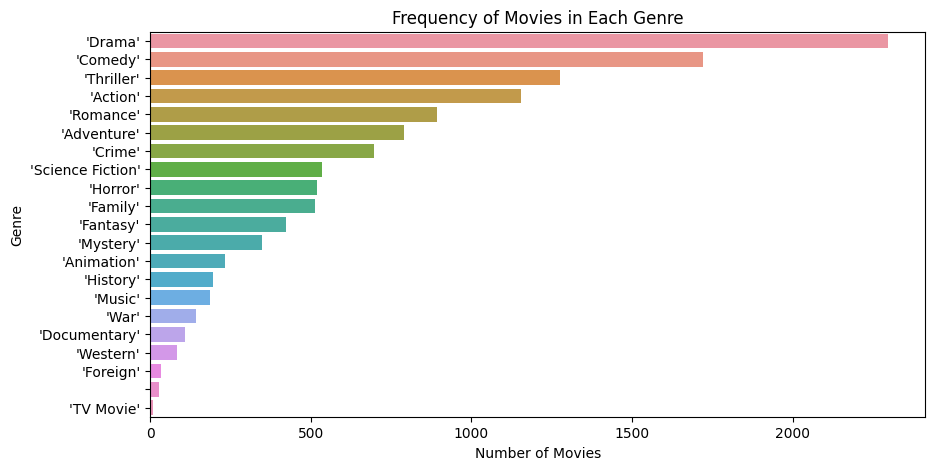

In [77]:
# Clean up genre names
movies_df['genres'] = movies_df['genres'].str.replace(r'\[|\]', '', regex=True)

# Most successful genres
genre_counts = movies_df['genres'].str.split(', ').explode().value_counts()
plt.figure(figsize=(10, 5)) 
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Frequency of Movies in Each Genre')
plt.show()

#### Three different interesting visualisations with a data story.

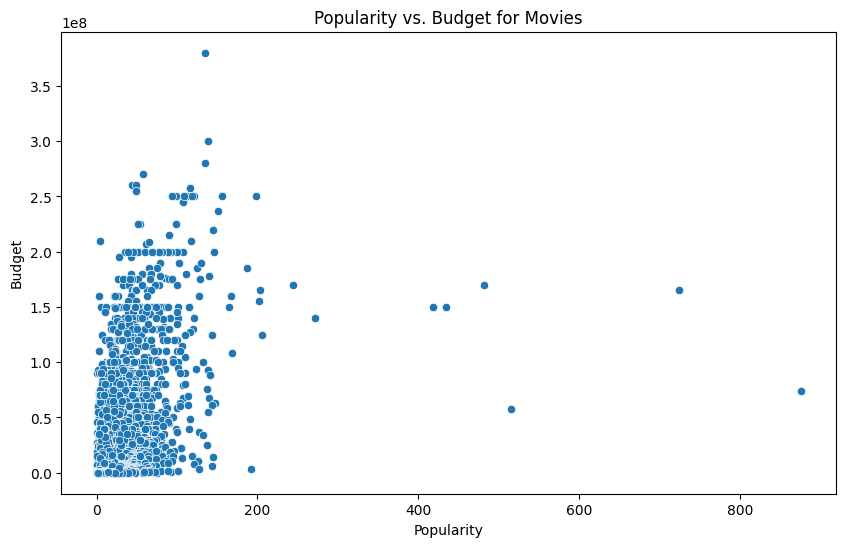

In [84]:
# Visualization 1: Popularity vs. Budget

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='budget', data=movies_df)
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.title('Popularity vs. Budget for Movies')
plt.show()


### Data Story:
This scatter plot displays the relationship between movie popularity and budget. By examining the distribution of points, we can determine if there's any correlation between a movie's budget and its popularity. It appears that while there isn't a strong linear correlation, there are movies with varying budgets that have achieved high popularity scores. This suggests that budget alone may not be the sole determinant of a movie's popularity.

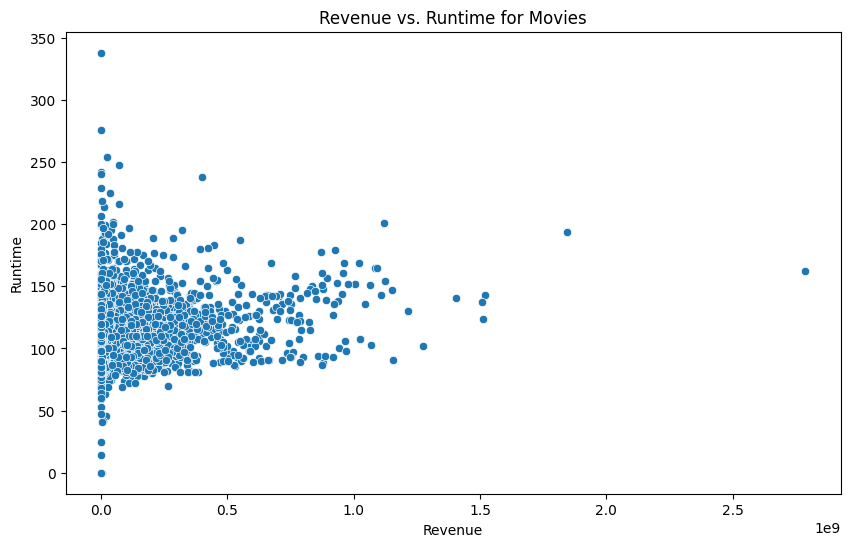

In [85]:
# Visualization 2: Revenue vs. Runtime

plt.figure(figsize=(10, 6))
sns.scatterplot(x='revenue', y='runtime', data=movies_df)
plt.xlabel('Revenue')
plt.ylabel('Runtime')
plt.title('Revenue vs. Runtime for Movies')
plt.show()


### Data Story:
This scatter plot illustrates the relationship between movie revenue and runtime. By analyzing the plot, we can observe if there's any tendency for longer movies to generate higher revenue. While there isn't a clear linear pattern, it appears that there are both short and long movies that have achieved high revenue. This suggests that a movie's success isn't solely dependent on its runtime.

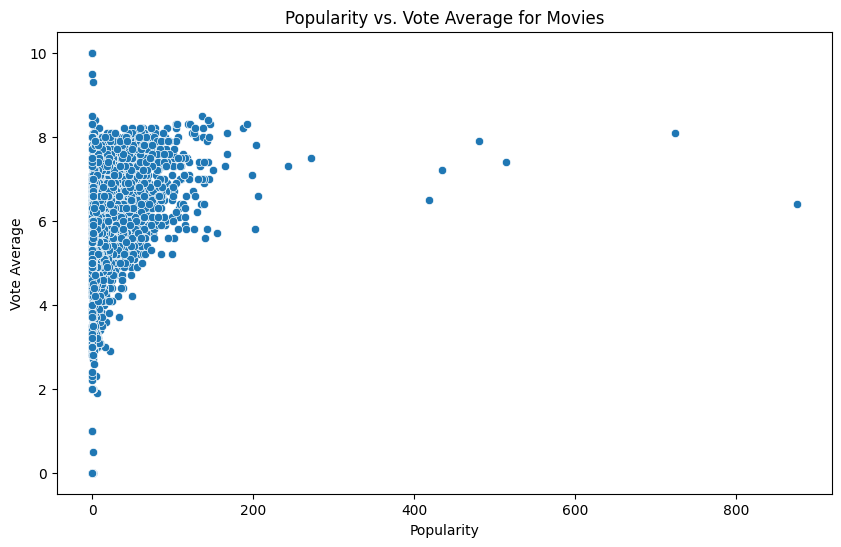

In [86]:
# Visualization 3: Popularity vs. Vote Average

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=movies_df)
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Popularity vs. Vote Average for Movies')
plt.show()


### Data Story:
This scatter plot showcases the relationship between movie popularity and vote average. By examining the scatter, we can determine if there's a correlation between a movie's popularity and the average vote it receives from viewers. Generally, we can observe that movies with higher popularity tend to have higher vote averages. This suggests that movies that attract a larger audience are often better received by viewers.